In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi",                
               "Claudia Wagner",
               "Markus Strohmaier"]
__license__ = "GPL"
__version__ = "1.0.0"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<div style="text-align:center;"><h1>Datasets: Real-World networks</h1></div>

<h2>Dependencies</h2>

In [2]:
import warnings
warnings.simplefilter("ignore")
warnings.warn("deprecated", DeprecationWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import os
import sys
import powerlaw
import pandas as pd
import networkx as nx

In [3]:
%load_ext autoreload
%autoreload 2
sys.path.append('../../code')

from org.gesis.libs import io
from org.gesis.libs import viz
from org.gesis.libs.utils import printf
from org.gesis.libs import network


<h2>Constants</h2>

In [4]:
DATASETS = ['aps', 'apsgender3', 'apsgender8', 'github', 'pokec', 'wikipedia'] #'twitter'
ROOT = '../../data/'
PLOTS = '../../plots/'
OUTPUT = "../../results-batch/"

<h2>Datasets' description</h2>

In [5]:
df_summary = network.get_all_datasets_summary(DATASETS, ROOT, OUTPUT)
df_summary.round({'EMM': 3, 'EMm': 3, 'EmM': 3, 'Emm': 3,
                  'density': 5, 'fm': 3, 
                  'hMM':2, 'hmm':2,
                  'gammaM':2, 'gammam':2})

,dataset,N,cc,class,m,M,fm,E,Emm,EMM,...,gammaM,kminM,kmaxM,gammam,kminm,kmaxm,hMM,hmm,triadsratio,triadspdf
0,APS,1853,173,pacs,05.20.-y,05.30.-d,0.376,3638,0.294,0.650,...,2.88,4.0,15.0,5.02,5.0,9.0,0.95,0.93,7.741234e-07,"[0.0, 0.2602935911206588, 0.0, 0.6942355889724..."
1,APSgender3,9679,174,gender,female,male,0.102,174760,0.015,0.818,...,4.91,105.0,283.0,1.83,11.0,230.0,0.82,0.27,6.067675e-06,"[0.0, 0.002463174282732545, 0.0, 0.74432729978..."
2,APSgender8,10059,300,gender,female,male,0.105,183067,0.011,0.829,...,1.86,13.0,466.0,1.91,11.0,416.0,0.50,0.60,2.384959e-05,"[0.0, 0.0006445705130733074, 0.0, 0.7775175926..."
3,Github,296612,6965,gender,female,male,0.059,1723930,0.005,0.899,...,2.85,60.0,7588.0,2.66,21.0,7994.0,0.55,0.61,2.551588e-10,"[0.00012062479001814398, 0.0006425589775966516..."
4,Pokec,1632636,1,gender,1,0,0.493,30622117,0.195,0.250,...,4.51,131.0,3878.0,3.85,109.0,8763.0,0.51,0.38,2.853004e-11,"[0.043744452862550076, 0.0685444396945499, 0.0..."
5,Wikipedia,3159,66,gender,female,male,0.152,14890,0.030,0.785,...,3.65,17.0,47.0,2.44,5.0,39.0,0.67,0.58,1.416910e-06,"[0.0009691331104327179, 0.0026166593981683385,..."


<h2>Latex summary</h2>

In [6]:
df_latex_summary = network.all_datasets_summary_as_latex(df_summary, OUTPUT)
df_latex_summary

../../results-batch/summary_datasets.tex saved!


dataset,APS,APSgender3,APSgender8,Github,Pokec,Wikipedia
N,1853,9679,10059,296612,1632636,3159
cc,173,174,300,6965,1,66
class,pacs,gender,gender,gender,gender,gender
M,05.30.-d,male,male,male,0,male
m,05.20.-y,female,female,female,1,female
fm,0.375607,0.10218,0.10508,0.0585546,0.49266,0.152263
E,3638,174760,183067,1723930,30622117,14890
EMM,0.649808,0.818076,0.829166,0.898512,0.249719,0.784688
EMm,0.0285871,0.0852426,0.0799489,0.050748,0.247656,0.0782404
EmM,0.0272128,0.0821069,0.0794081,0.0457635,0.307452,0.10685


<h2>Node attributes</h2>

In [7]:
df_metadata = network.load_all_datasets_node_metadata_empirical(DATASETS, ROOT) 
df_metadata.head()

,circle_of_trust,dataset,indegree,minority,node,outdegree,pagerank,wtf
0,0.0,aps,0,0,1,2,0.000230,0.0
1,14.0,aps,11,0,2,2,0.001268,17.0
2,10.0,aps,2,1,3,0,0.001534,0.0
3,0.0,aps,0,1,4,2,0.000230,0.0
4,2.0,aps,1,0,5,0,0.000591,0.0


<h2>Degree Distributions</h2>

../../plots/degree_distributions_empirical.pdf saved!


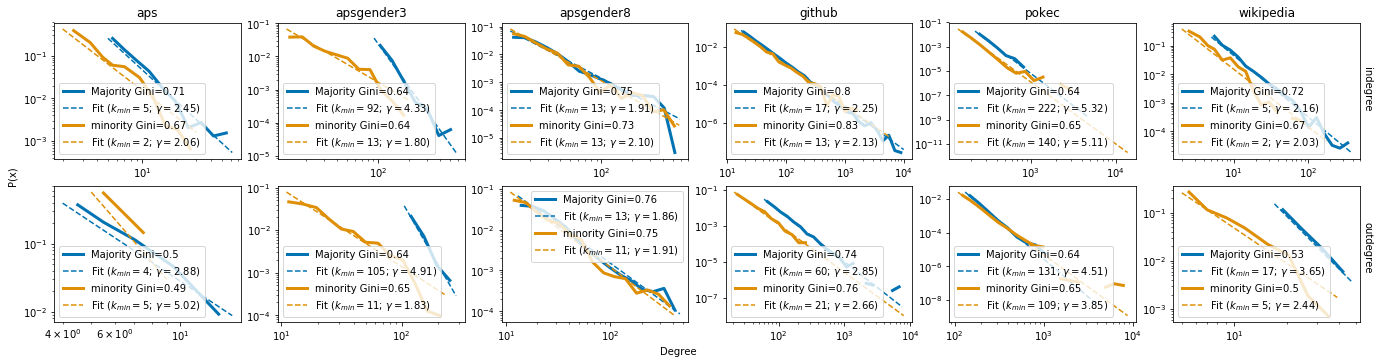

In [8]:
fn = os.path.join(PLOTS, 'degree_distributions_empirical.pdf')
viz.plot_degree_distributions_groups(df_metadata, fn)